# 차원 축소
_참고서적 : 권철민 <파이썬 머신러닝 완벽 가이드> 위키북스_

* **차원 축소 ?**

매우 많은 피처로 구성된 다차원 데이터 세트의 차원을 축소해 새로운 차원의 데이터 세르를 생성하는 것
일반적으로 차원이 증가할수록 데이터 포인트 간의 거리가 기하급수적으로 멀어지게 되고, 희소(sparse)한 구조를 가지게 된다. 수백 개 이상의 피처로 구성된 데이터 세트의 경우 상대적으로 적은 차원의 학습된 모델보다 예측 신뢰도가 떨어진다. 또한 피처가 많을 경우 개별 피처 간에 상관관계가 높을 가능성이 크다.

* 차원 축소 종류
    * 피처 선택(feature selection): 특정 피처에 종속성이 강한 불필요한 피처는 아예 제거하고, 데이터의 특징을 잘 나타내는 주요 피처만 선택.
    * 피처 추출(feature extraction):  기존 피처를 저차원의 중요 피처로 압축해서 추출하는 것. 기존 피처가 압축된 것이므로 기존의 피처와는 완전히 다른 값이 된다. 기존 피처를 단순 압축하는 것이 아닌, 피처를 함축적으로 더 잘 설명할 수 있는 또다른 공간으로 매핑해 추출하는 것.

차원 축소를 통해 좀 더 데이터를 잘 설명할 수 있는 잠재적인 요소를 추출하는데 중요한 의미가 있다. 매우 많은 차원을 가지고있는 이미지나 텍스트에서 차원 축소를 통해 잠재적인 의미를 찾아 주는 데 이 알고리즘이 잘 활용되고 있다.

## PCA

## PCA(Principal Component Analysis)
여러 변수 간에 존재하는 상관관계를 이용해 이를 대표하는 주성분(Principal Component)을 추출해 차원을 축소하는 기법. PCA는 가장 높은 분산을 가지는 데이터의 축을 찾아 이 축으로 차원을 축소하는데, 이것이 PCA의 주성분이 된다. 

PCA는 제일 먼저 가장 큰 데이터 변동성(Variance)을 기반으로 첫 번째 벡터 축을 생성하고, 두 번째 축은 이 벡터 축에 직각이 되는 벡터(직교 벡터)를 축으로 합니다. 세 번째 축은 다시 두 번째 축과 직각이 되는 벡터를 설정하는 방식으로 축을 생성합니다. 이렇게 생성된 벡터 축에 원본 데이터를 투영하면 벡터 축의 개수만큼의 차원으로 원본 데이터가 차원이 축소된다. 선형 대수 관점에서 해석해 보면 입력 데이터의 공분산 행렬(Covariance Matrix)을 고유값 분해하고, 이렇게 구한 고유벡터에 입력 데이터를 선형 변환하는 것이다.

![PCA](http://i.imgur.com/jWJ2nUs.png)


### PCA예제1 - 붓꽃 데이터 ( 4 -> 2차원)

In [2]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
iris = load_iris()

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [41]:
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF = pd.DataFrame(iris.data, columns=columns)
irisDF['target'] = iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


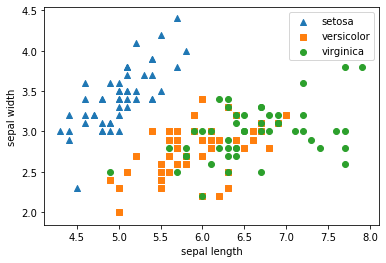

In [13]:
#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot 
for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
    y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

먼저 PCA를  적용하기 전에 개별 속성을 함께 스케일링 해야한다. PCA는 여러 속성의 값을 연산해야 하므로 속성의 스케일에 영향을 받는다. 따라서 여러 속성을 PCA로 압축하기 전에 각 속성값을 동일한 스케일로 변환하는 것이 필요하다. 

In [42]:
from sklearn.preprocessing import StandardScaler

iris_scaled = StandardScaler().fit_transform(irisDF)

In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [19]:
# PCA 환된 데이터의 컬럼명을 각각 pca_component_1, pca_component_2로 명명
pca_columns=['pca_component_1','pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca,columns=pca_columns)
irisDF_pca['target']=iris.target
irisDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.576120,0.474499,0
1,-2.415322,-0.678092,0
2,-2.659333,-0.348282,0


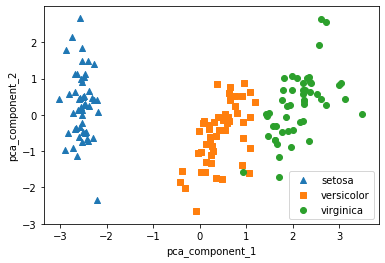

In [20]:
markers=['^', 's', 'o']

#pca_component_1 을 x축, pc_component_2를 y축으로 scatter plot 수행. 
for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

pca로 변환된 데이터 세트가 원본보다 더 명확하게 분리되었다. 1성분 기준으로 명확한 구분이 가능한 것으로 보아 1성분이 원본 데이터의 변동성을 잘 반영한 것으로 보인다.

* explained_variance_ratio_ : 전체 변동성에서 개별 PCA 컴포넌트 별로 차지하는 변동성 비율을 제공

In [21]:
print(pca.explained_variance_ratio_)

[0.76740358 0.18282727]


첫 번째 PCA 변환 요소인 pca_component_1이 전체 변동성의 약 76.5%를 차지하며, 두 번째 요소는 약 18.4%를 차지한다. 따라서 PCA를 2개 요소로만 변환해도 원본 데이터의 변동성을 95% 설명할 수 있다.

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target,scoring='accuracy',cv=3)
print(scores)


[0.98 0.94 0.96]


In [23]:
pca_X = irisDF_pca[['pca_component_1', 'pca_component_2']]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3 )
print(scores_pca)

[0.98 0.98 1.  ]


### PCA예제2 - 신용카드 고객 데이터 세트

In [30]:
import pandas as pd

df = pd.read_excel('data/default of credit card clients.xls', header=1, sheet_name='Data').iloc[0:,1:]
print(df.shape)
df.head(3)

(30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [31]:
df.rename(columns={'PAY_0':'PAY_1','default payment next month':'default'}, inplace=True)
y_target = df['default']
X_features = df.drop('default', axis=1)

In [32]:
X_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_1      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

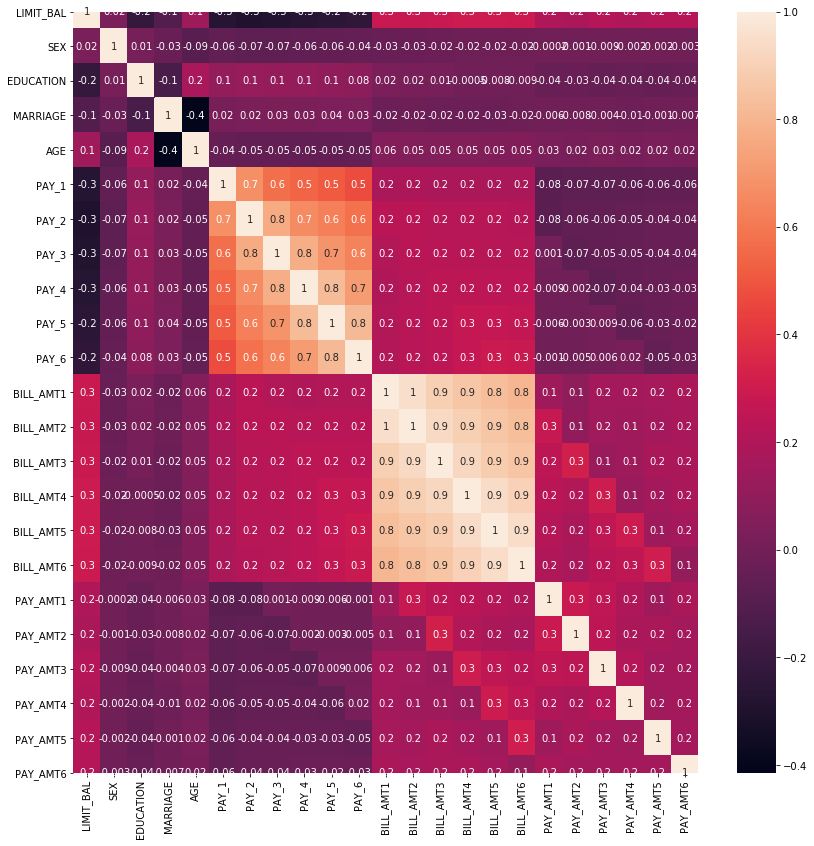

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr = X_features.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, fmt='.1g')

대부분의 속성의 상관도가 0.9이상으로 매우 높음을 알 수 있다.

In [34]:

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#BILL_AMT1 ~ BILL_AMT6 까지 6개의 속성명 생성
cols_bill = ['BILL_AMT'+str(i) for i in range(1,7)]
print('대상 속성명:',cols_bill)

# 2개의 PCA 속성을 가진 PCA 객체 생성하고, explained_variance_ratio_ 계산 위해 fit( ) 호출
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])
pca = PCA(n_components=2)
pca.fit(df_cols_scaled) 

print('PCA Component별 변동성:', pca.explained_variance_ratio_)

대상 속성명: ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
PCA Component별 변동성: [0.90555253 0.0509867 ]


두개의 PCA 컴포넌트만으로도 6개 속성의 변동성을 약 95% 이상 설명할 수 있을 정도로 6개 속성의 상관도가 높은 것을 알 수 있다.

In [35]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(n_estimators=300, random_state=156)
scores = cross_val_score(rcf, X_features, y_target, scoring='accuracy', cv=3 )

print('CV=3 인 경우의 개별 Fold세트별 정확도:',scores)
print('평균 정확도:{0:.4f}'.format(np.mean(scores)))

CV=3 인 경우의 개별 Fold세트별 정확도: [0.8083 0.8196 0.8232]
평균 정확도:0.8170


In [36]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 원본 데이터셋에 먼저 StandardScaler적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)

# 6개의 Component를 가진 PCA 변환을 수행하고 cross_val_score( )로 분류 예측 수행. 
pca = PCA(n_components=6)
df_pca = pca.fit_transform(df_scaled)
scores_pca = cross_val_score(rcf, df_pca, y_target, scoring='accuracy', cv=3)

print('CV=3 인 경우의 PCA 변환된 개별 Fold세트별 정확도:',scores_pca)
print('PCA 변환 데이터 셋 평균 정확도:{0:.4f}'.format(np.mean(scores_pca)))

CV=3 인 경우의 PCA 변환된 개별 Fold세트별 정확도: [0.7925 0.7973 0.8026]
PCA 변환 데이터 셋 평균 정확도:0.7975


## LDA(Linear Discriminant Analysis)

* **LDA란?**

LDA는 선형 판별 분석법으로 불린다. PCA와 유사하게 입력 데이터 세트를 저차원 공간에 투영해 차원을 축소하는 기법이지만, LDA는 지도학습 분류에서 사용하기 쉽도록 입력 데이터의 결정 값 클래스를 최대한 분리할 수 있는 축을 찾아 차원을 축소한다. LDA는 특정 공간상에서 클래스 분리를 최대화하는 축을 찾기 위해 클래스 간 분산과 클래스 내부 분산의 비율을 최대화하는 방식으로 차원을 축소한다.

선형대수적으로 PCA와의 가장 큰 차이점은 공분산 행렬이 아니라 설명한 클래스 간 분산과 클래스 내부 분산 행렬을 생성한 뒤, 이 행렬에 기반해 고유 벡터를 구하고 입력 데이터를 투영한다는 점이다.

In [38]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [44]:
iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)

In [45]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled, iris.target)
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


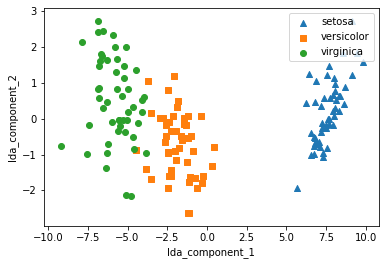

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

lda_columns=['lda_component_1','lda_component_2']
irisDF_lda = pd.DataFrame(iris_lda,columns=lda_columns)
irisDF_lda['target']=iris.target

#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot
for i, marker in enumerate(markers):
    x_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_1']
    y_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_2']

    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend(loc='upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()


## NMF(Non-Negative Matrix Factorization)
NMF는 낮은 랭크를 통한 행렬 근사 방식의 변형이다.

/Users/jihyun/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/Users/jihyun/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


Text(0, 0.5, 'NMF Component 2')

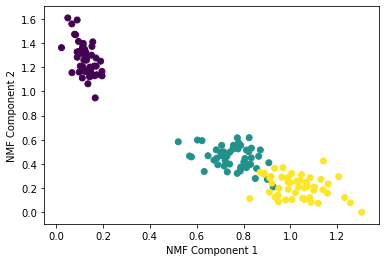

In [48]:
from sklearn.decomposition import NMF
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data
nmf = NMF(n_components=2)
nmf.fit(iris_ftrs)
iris_nmf = nmf.transform(iris_ftrs)
plt.scatter(x=iris_nmf[:,0], y= iris_nmf[:,1], c= iris.target)
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')